<a href="https://colab.research.google.com/github/janespino24/PhDinDS/blob/main/SOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standing Ovation Problem (SOP) - Modeling Exercise

Following are two potential models for the SOP.
Key Assumptions:
1. 20 rows, 20 seats per row (square seating area)
2. An initial number of people (parameterized) will immediately stand at the end of the program (randomized)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Initialize tendency of persons to stand up

In [ ]:
row = 20 # rows in auditorium
seat = 20 # seats per row
tendency = np.zeros((row,seat)) # initialize matric "tendency" of person seating in row,seat to stand

for r in range(row):
    for s in range(seat):
        tendency[r][s] = np.random.rand()  # generate random number from 0 to 1


# Model 1 - influenced by all adjacent persons

Each person stands up if >= pct% of adjacent persons are standing, seats otherwise.
Adjacent is defined as:

  A A A

  A P A

  A A A

where P is the subject person, and A are his/her adjacents.
Each time period will have one row deciding, starting from the 1st row. One cycle is "row" time periods.

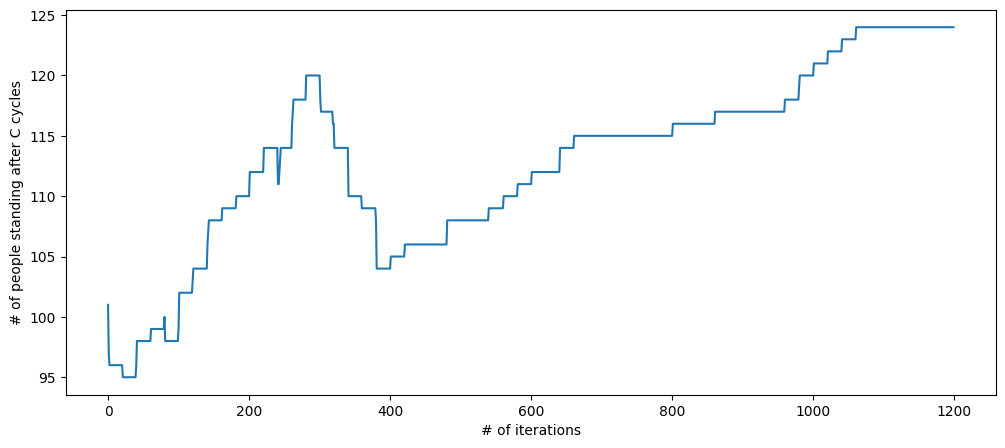

In [ ]:
initial = 25 # percentage of people who will immediately stand up
standing = np.zeros((row,seat)) #all are seated initially
num_stand = []

standing = tendency < initial/100  # initially people will stand at random, based on initial percentage
num_stand.append(standing.sum()) # store number of people standing to list of count

cycles = 3  # number of cycles. Time periods of the series = cycles x rows
num_adj = 0  # number of adjacent persons
pct = 0.5 # hurdle rate to stand

def Model1(c,r,s,pct):
    count = [] #list of count
    for c in range(cycles):
        for r in range(row):
            for s in range(seat):
                if r == 0:   # for first row
                    if s == 0:   # for first seat
                        num_adj = 3
                        adjacents = (standing[0][1], standing[1][0], standing[1][1])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 3
                        adjacents = (standing[0][18], standing[1][18], standing[1][19])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=5
                            adjacents = (standing[0][s-1], standing[0][s+1], standing[1][s-1], standing[1][s], standing[1][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)

                elif r == 19:   # for last row
                    if s == 0:   # for first seat
                        num_adj = 3
                        adjacents = (standing[19][1], standing[18][0], standing[18][1])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 3
                        adjacents = (standing[19][18], standing[18][18], standing[18][19])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=5
                            adjacents = (standing[19][s-1], standing[19][s+1], standing[18][s-1], standing[18][s], standing[18][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                else:
                    if s == 0:   # for first seat
                        num_adj = 5
                        adjacents = (standing[r][1], standing[r-1][0], standing[r-1][1], standing[r+1][0], standing[r+1][1])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 5
                        adjacents = (standing[r][18], standing[r-1][18], standing[r-1][19], standing[r+1][18], standing[r+1][18])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=8
                            adjacents = (standing[r][s-1], standing[r][s+1], standing[r-1][s-1], standing[r-1][s], standing[r-1][s+1], standing[r+1][s-1], standing[r+1][s], standing[r+1][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)

                count.append(standing.sum())
    return count

count1 = Model1(cycles, row, seat, pct)
plt.figure(figsize=(12, 5))
plt.xlabel('# of iterations')
plt.ylabel('# of people standing after C cycles')
pd.Series(count1).plot();


# Model 2 - influenced by adjacent person to the side and in front (and not those at the back)

Each person stands up if >= pct% of adjacent persons in front are standing, seats otherwise.
Adjacent in front is defined as:

  A A A

  A P A


where P is the subject person, and A are his/her adjacents.
Each time period will have one row deciding, starting from the 1st row. One cycle is "row" time periods.

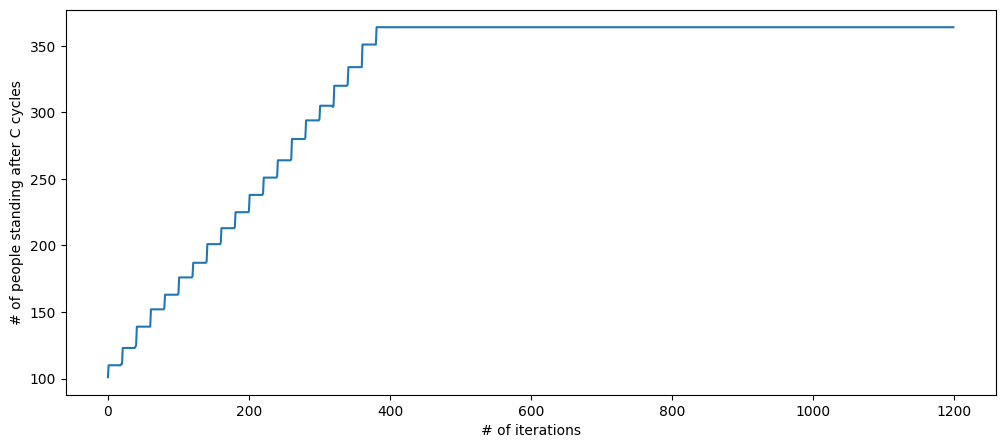

In [ ]:
initial = 25 # percentage of people who will immediately stand up
standing = np.zeros((row,seat)) #all are seated initially
num_stand = []

standing = tendency < initial/100  # initially people will stand at random, based on initial percentage
num_stand.append(standing.sum()) # store number of people standing to list of count

cycles = 3  # number of cycles. Time periods of the series = cycles x rows
num_adj = 0  # number of adjacent persons
pct = 0.5 # hurdle rate to stand

def Model2(c,r,s,pct):
    count = [] #list of count
    for c in range(cycles):
        for r in range(row):
            for s in range(seat):
                if r == 0:   # for first row
                    if s == 0:   # for first seat
                        num_adj = 1
                        adjacents = (standing[0][1])
                        standing[r][s] = ((standing[0][1]/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 1
                        adjacents = (standing[0][18])
                        standing[r][s] = ((standing[0][18]/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=2
                            adjacents = (standing[0][s-1], standing[0][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)

                elif r == 19:   # for last row
                    if s == 0:   # for first seat
                        num_adj = 3
                        adjacents = (standing[19][1], standing[18][0], standing[18][1])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 3
                        adjacents = (standing[19][18], standing[18][18], standing[18][19])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=5
                            adjacents = (standing[19][s-1], standing[19][s+1], standing[18][s-1], standing[18][s], standing[18][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                else:
                    if s == 0:   # for first seat
                        num_adj = 3
                        adjacents = (standing[r][1], standing[r-1][0], standing[r-1][1])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    elif s == 19:
                        num_adj = 3
                        adjacents = (standing[r][18], standing[r-1][18], standing[r-1][19])
                        standing[r][s] = ((sum(adjacents)/num_adj) >= pct)
                    else:
                        for s in range(1,18,1):
                            num_adj=5
                            adjacents = (standing[r][s-1], standing[r][s+1], standing[r-1][s-1], standing[r-1][s], standing[r-1][s+1])
                            standing[r][s] = ((sum(adjacents)/num_adj) >= pct)

                count.append(standing.sum())
    return count


count2 = Model2(cycles, row, seat, pct)
plt.figure(figsize=(12, 5))
plt.xlabel('# of iterations')
plt.ylabel('# of people standing after C cycles')
pd.Series(count2).plot();

# Comparison of models

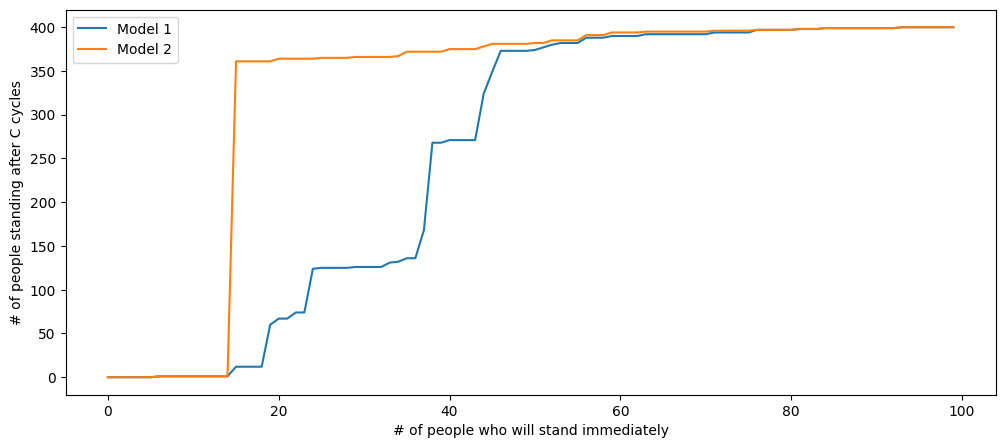

In [ ]:
# Find initial number (i) of people standing where convergence to full standing ovation happens

final = [] # list of final number of people standing
num_stand1 = []
num_stand2 = []

for i in range(100):

    initial = i+1 # percentage of people who will immediately stand up
    standing = np.zeros((row,seat)) #all are seated initially
    num_stand = []
    standing = tendency < initial/100  # initially people will stand at random, based on initial percentage
    num_stand.append(standing.sum()) # store number of people standing to list of count

    cycles = 3  # number of cycles. Time periods of the series = cycles x rows
    num_adj = 0  # number of adjacent persons
    pct = 0.5 # hurdle rate to stand

    count1 = Model1(cycles, row, seat, pct)
    num_stand1.append(standing.sum())
    count2 = Model2(cycles, row, seat, pct)
    num_stand2.append(standing.sum())

plt.figure(figsize=(12, 5))
pd.Series(num_stand1).plot(label="Model 1")
pd.Series(num_stand2).plot(label="Model 2")
plt.xlabel('# of people who will stand immediately')
plt.ylabel('# of people standing after C cycles')
plt.legend();